In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

MNIST手寫阿拉伯數字訓練資料
http://yann.lecun.com/exdb/mnist/
注意其中一個訓練方式: 40PCA + quadratic classifier

In [2]:
# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#60,000筆訓練集，10,000筆測試集
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# 建立模型
"""
Flatten Layer：將寬、高各28個像素的圖轉成一維陣列 28 x 28 = 784個特徵。
Dense Layer：input為784個特徵，output 為128個神經元，即128條迴歸線。
Dropout Layer：在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
最後一個 Dense Layer：輸出10個神經元，透過 softmax activation function，轉成機率，即0~9的預測機率，選擇最大機率者為預測值
"""
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 模型訓練
model.fit(x_train, y_train, epochs=5)
# 模型評估，打分數
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2947 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1414 - accuracy: 0.9585
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1090 - accuracy: 0.9666
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0852 - accuracy: 0.9739
Epoch 5/5
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0722 - accuracy: 0.9779


[0.07218672580309213, 0.9779]

1.顯示圖片資料

In [6]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy() #28條array每條28column且非零部分為小數
data[data>0]=1
# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image #顯示5

['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 

ERROR! Session/line number was not unique in database. History logging moved to new session 225


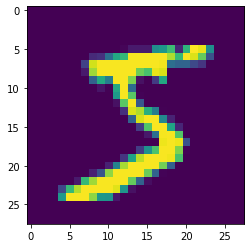

In [7]:
import matplotlib.pyplot as plt
x0=x_train[0,:]
plt.imshow(x0.reshape(28,28))

加入驗證資料

In [8]:
# 加入驗證集調正模型內部的參數(hyperparameter)，驗證多次後選出驗證成果最好的模型跟其他人比(進入test data)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0415 - val_accuracy: 0.9861
Epoch 2/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0569 - accuracy: 0.9815 - val_loss: 0.0451 - val_accuracy: 0.9858
Epoch 3/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0503 - accuracy: 0.9831 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 4/5
48000/48000 [==============================] - 3s 54us/sample - loss: 0.0460 - accuracy: 0.9842 - val_loss: 0.0498 - val_accuracy: 0.9822
Epoch 5/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0438 - val_accuracy: 0.9867


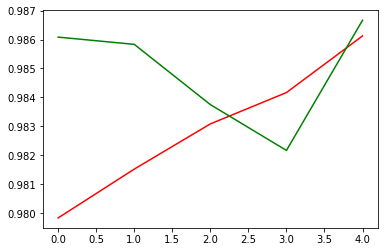

In [9]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
# Q: 這樣的趨勢怎麼解釋?

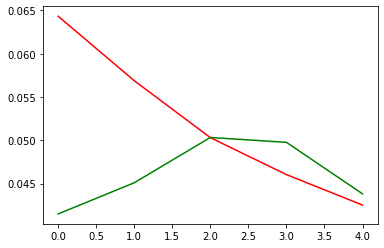

In [10]:
# 對訓練過程的損失函數繪圖
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

prediction: [9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2
 5 0 1 1 1 0 9 0 3 1 6 4 2]
actual    : [9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2
 5 0 1 1 1 0 9 0 3 1 6 4 2]


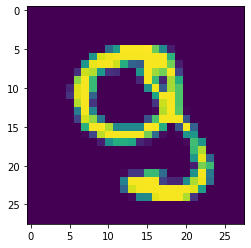

In [11]:
# 實際預測 20 筆
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)
# get prediction result
print('prediction:', predictions[150:200])
print('actual    :', y_test[150:200])
# 顯示錯誤的(第151張圖)資料圖像
x1 = x_test[151,:]
plt.imshow(x1.reshape(28,28))
plt.show() 
#實際上是9但預測為8

使用小畫家，寫0~9，實際測試看看

In [16]:
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = './digit8.png'
image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255
# 反轉顏色
# 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
X1 = np.abs(1-X1)
predictions = model.predict_classes(X1)
print(predictions)

[5]


In [20]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = './digit7.png'
image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X2 = image_resized.reshape(1,28, 28) #/ 255
# 反轉顏色
# 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
X2 = np.abs(1-X2)
predictions = model.predict_classes(X2)
print(predictions)

[2]


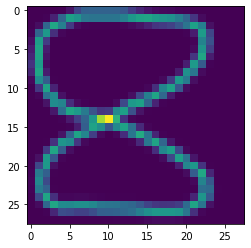

In [18]:
plt.imshow(X1.reshape(28,28))
plt.show() 

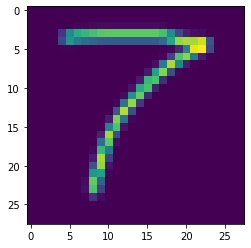

In [21]:
plt.imshow(X2.reshape(28,28))
plt.show() 

參考資料:
https://ithelp.ithome.com.tw/articles/10233758
利用opencv對小畫家的圖做轉換
https://github.com/jessica-anyen/nn_practice/commit/c84a0e802d45e5fb448b4004c60fbc018f0152fb